In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/final_cccf(1).csv')

In [5]:
data.head()

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11275 entries, 0 to 11274
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ss_username  11275 non-null  object 
 1   cf_username  11068 non-null  object 
 2   cf_rating    7437 non-null   float64
 3   cc_username  10280 non-null  object 
 4   cc_rating    10280 non-null  float64
dtypes: float64(2), object(3)
memory usage: 440.6+ KB


In [7]:
data.describe()

,cf_rating,cc_rating
count,7437.000000,10280.000000
mean,1373.551029,1678.185798
std,344.707169,252.891793
min,187.000000,179.000000
25%,1147.000000,1537.000000
50%,1366.000000,1695.000000
75%,1601.000000,1843.000000
max,3764.000000,3007.000000


In [8]:
data.dropna(subset=['cc_rating', 'cf_rating'], inplace=True)
data.shape

(6442, 5)

In [9]:
x=data['cc_rating']
y=data['cf_rating']
print(x.shape)
print(y.shape)

(6442,)
(6442,)


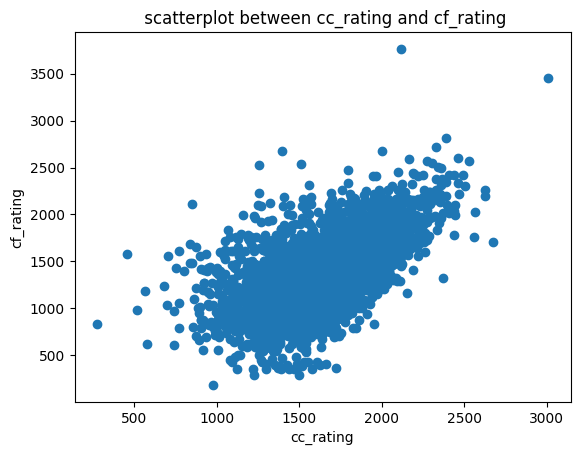

In [10]:
plt.scatter(x=x,y=y)
plt.title(" scatterplot between cc_rating and cf_rating")
plt.xlabel("cc_rating")
plt.ylabel("cf_rating")
sns.set()

In [12]:
class regression:
  def __init__(self,x,y):
    self.x=x
    self.y=y
  def loss(self,y_pred):
    return (((self.y-y_pred)**2).sum())/6442
  def gradient(self,y_pred):
    dw=(2*np.dot(self.x.T,(self.y - y_pred)))/6442
    db=(2*np.sum(self.y-y_pred))/6442
    return -dw,-db
  def training(self):
    w=0
    b=0
    lr=0.001
    epoch=2000
    losses=[]
    for i in range(epoch):
      y_pred=w*self.x+b
      dw,db=self.gradient(y_pred)
      w=w-lr*dw
      b=b-lr*db
      losses.append(self.loss(y_pred))
    return w,b,losses




In [18]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x_scaled = scaler_x.fit_transform(x.values.reshape(-1, 1)).flatten()
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()
model=regression(x_scaled,y_scaled)
coeff,intercept,training_losses=model.training()
print("coeff",coeff)
print("intercept",intercept)


coeff 0.6131936194866485
intercept 1.1102202671634414e-16


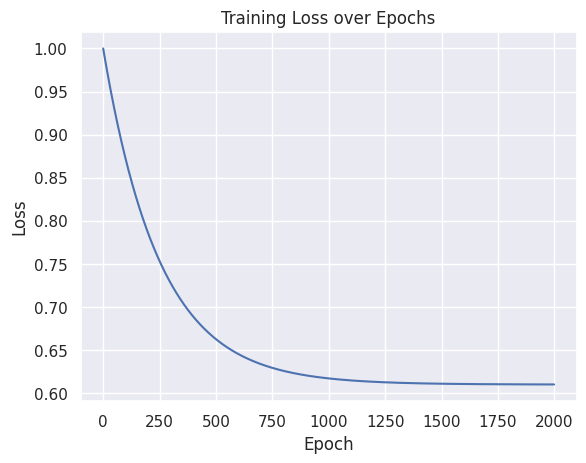

In [17]:
plt.plot(training_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.show()

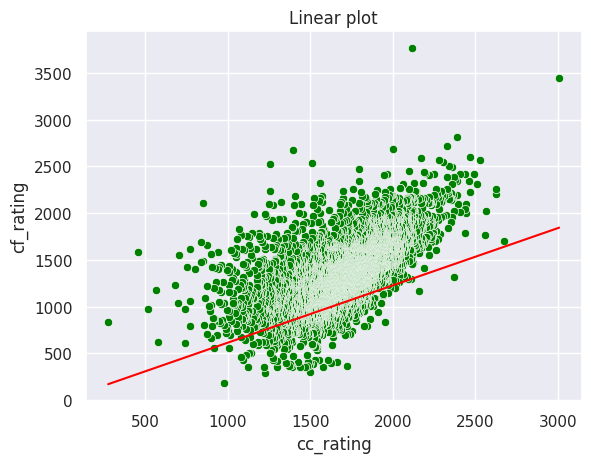

In [19]:
sns.scatterplot(x=x,y=y,color='green')
plt.title("Linear plot")
plt.xlabel("cc_rating")
plt.ylabel("cf_rating")
plt.plot(x,coeff*x +intercept,color='red')
sns.set()


In [20]:
def converter(x):
  return (x*coeff+intercept)
for i in range(700,1600,100):
  print(f"cc_rating:{i}=cf_rating:{converter(i)}")

cc_rating:700=cf_rating:429.23553364065395
cc_rating:800=cf_rating:490.5548955893188
cc_rating:900=cf_rating:551.8742575379837
cc_rating:1000=cf_rating:613.1936194866486
cc_rating:1100=cf_rating:674.5129814353133
cc_rating:1200=cf_rating:735.8323433839782
cc_rating:1300=cf_rating:797.1517053326431
cc_rating:1400=cf_rating:858.4710672813079
cc_rating:1500=cf_rating:919.7904292299728
